
### Support Vector Machine (SVM)
#### Main Points: 

1. **Versatility**: SVM is a powerful and flexible machine learning model capable of:
   - Linear classification
   - Nonlinear classification
   - Regression
   - Novelty detection

2. **Performance**: SVMs are particularly effective with small to medium-sized datasets (hundreds to thousands of instances), especially for nonlinear classification tasks.

3. **Limitations**:
   - SVMs don't scale well to very large datasets.
   - They may become computationally expensive and memory-intensive as dataset size increases.


### Setup

Checking the python and sklearn versions:

In [3]:
import sys

assert sys.version_info >= (3, 7)

In [4]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

### Linear SVM Classification
#### Main Points:

1. **Basic Concept**: SVMs aim to find the optimal decision boundary that separates classes, especially when the data is linearly separable.

2. **Example from the Iris Dataset**:
   - The dataset can be linearly separated with a straight line (i.e., linearly separable).
   - Three classifiers are shown:
     - **Bad classifier**: One does not separate the classes correctly.
     - **Good classifiers**: Two classifiers perform well on the training set but have decision boundaries close to the instances, potentially leading to poor performance on new data.

3. **SVM Classifier's Decision Boundary**:
   - The SVM decision boundary (solid line) not only separates the classes but maximizes the distance from the closest training instances, creating a **large margin**.
   - The widest possible "street" is placed between the two classes, and the boundary is determined by instances on the edge of the street.

4. **Support Vectors**:
   - The decision boundary is influenced only by the training instances on the edge of the street, called **support vectors** (circled in diagrams).
   - Adding more instances away from the support vectors does not affect the decision boundary.


In [5]:
# import necessary modules

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

In [6]:
# loading and preparing data for the training

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [7]:
# train a SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

SVC(C=1e+100, kernel='linear')

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, ax=None):
    """
    Plots the decision boundary for an SVM classifier along with the margin lines and support vectors.

    Parameters:
    svm_clf : SVM classifier (trained model)
        The SVM classifier for which we want to plot the decision boundary.
    xmin : float
        The minimum value of x-axis to plot.
    xmax : float
        The maximum value of x-axis to plot.
    """
    w = svm_clf.coef_[0]   # Coefficients for the linear decision boundary (w0, w1)
    b = svm_clf.intercept_[0]  # Intercept term for the decision boundary

    # Create a range of x values (x0) between xmin and xmax to plot the decision boundary
    x0 = np.linspace(xmin, xmax, 200)

    # Calculate the decision boundary: the line where the classifier predicts a 0.5 probability
    # Equation: w0*x0 + w1*x1 + b = 0, solved for x1 => x1 = -(w0/w1) * x0 - (b/w1)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    # Calculate the margin width based on the SVM parameters: margin = 1 / |w1|
    margin = 1 / w[1]

    # Calculate the upper and lower margins (gutter lines)
    gutter_up = decision_boundary + margin  # Upper margin line
    gutter_down = decision_boundary - margin  # Lower margin line

    # Get the support vectors from the SVM classifier
    support_vectors = svm_clf.support_vectors_

    # Plot the decision boundary (solid line)
    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)

    # Plot the upper and lower margin lines (dashed lines)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)

    # Highlight the support vectors as large gray circles
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=180, facecolors='#AAA', zorder=-1)


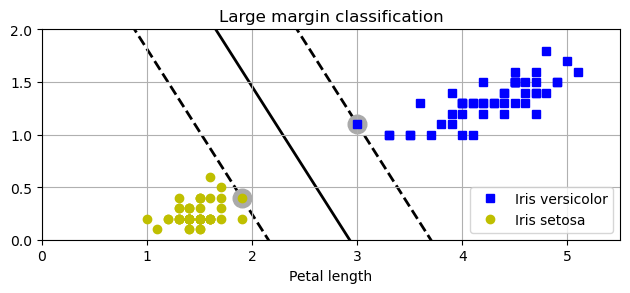

In [9]:
# plotting the outcome 

fig, ax = plt.subplots(nrows=1, ncols=1, squeeze=False)

# Plot the decision boundary
plot_svc_decision_boundary(svm_clf, 0, 5.5)

# Plot the data points for Iris versicolor and Iris setosa
ax[0][0].plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
ax[0][0].plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")

# Set the axis labels and limits
ax[0][0].set_xlabel("Petal length")
ax[0][0].set_xlim(0, 5.5)
ax[0][0].set_ylim(0, 2)
ax[0][0].set_title("Large margin classification")

# Add a legend
ax[0][0].legend()

# Set aspect ratio and enable grid
ax[0][0].set_aspect("equal")
ax[0][0].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


#### Note: Sensitivity to Feature Scaling

- **SVM Sensitivity**: SVMs are sensitive to the scale of features. If features have different scales, it can negatively impact the decision boundary.
  
- **Example**: 
  - In the left plot, the vertical scale is larger than the horizontal, causing the decision boundary to be nearly horizontal.
  - After applying feature scaling (e.g., with Scikit-Learn's `StandardScaler`), the decision boundary becomes more appropriate, as seen in the right plot.
  
- **Importance of Scaling**: Proper feature scaling ensures that SVM finds the optimal decision boundary.


In [10]:
# import necessary modules
from sklearn.preprocessing import StandardScaler

In [11]:
# creating data and train SVC
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

In [12]:
# scaling the same data, and train SVC
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

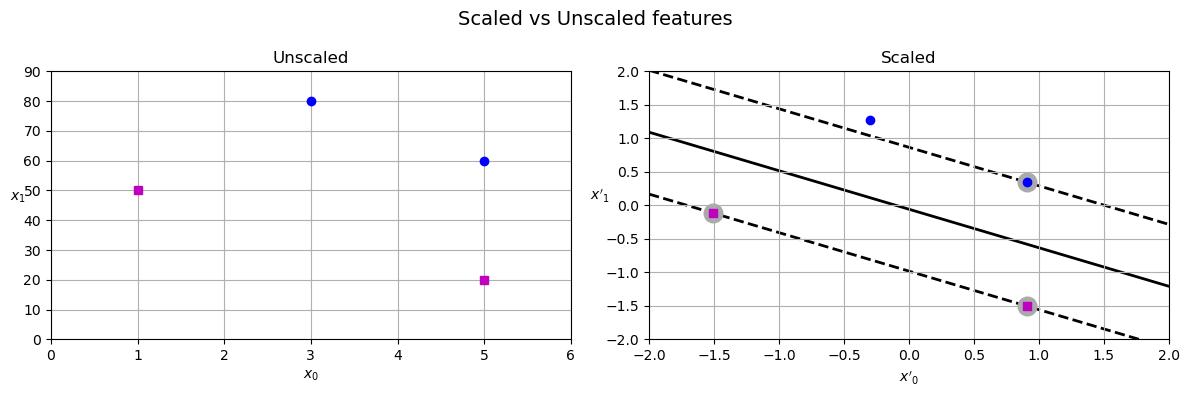

In [13]:
# ploting sensitivity to feature scales
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# First subplot: Unscaled data
ax[0].plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo", label="Class 1")
ax[0].plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms", label="Class 0")
plot_svc_decision_boundary(svm_clf, 0, 6, ax=ax[0])  # Pass ax[0] to plot decision boundary
ax[0].set_xlabel("$x_0$")
ax[0].set_ylabel("$x_1$", rotation=0)
ax[0].set_title("Unscaled")
ax[0].set_xlim(0, 6)
ax[0].set_ylim(0, 90)
ax[0].grid(True)

# Second subplot: Scaled data
ax[1].plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo", label="Class 1")
ax[1].plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms", label="Class 0")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2, ax=ax[1])  # Pass ax[1] to plot decision boundary
ax[1].set_xlabel("$x'_0$")
ax[1].set_ylabel("$x'_1$", rotation=0)
ax[1].set_title("Scaled")
ax[1].set_xlim(-2, 2)
ax[1].set_ylim(-2, 2)
ax[1].grid(True)

fig.suptitle("Scaled vs Unscaled features", fontsize=14)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Soft Margin Classification
#### Main Points: 

- **Hard Margin Classification**: This approach enforces that all instances must be correctly classified and lie on the correct side of the margin (i.e., off the "street").
  
- **Limitations of Hard Margin Classification**:
  1. It only works if the data is **linearly separable**.
  2. It is **sensitive to outliers**, as outliers can distort the decision boundary significantly.

- **Outlier Example**: 
  - With an additional outlier in the dataset, a hard margin becomes impossible to find.
  - The decision boundary shifts drastically, leading to poor generalization.


In [14]:
# Define the outliers
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])  # Two outliers
y_outliers = np.array([0, 0])  # Labels for the outliers (class 0)

# Add the first outlier to the dataset
X_with_outlier1 = np.concatenate([X, X_outliers[:1]], axis=0)
y_with_outlier1 = np.concatenate([y, y_outliers[:1]], axis=0)

# Add the second outlier to the dataset
X_with_outlier2 = np.concatenate([X, X_outliers[1:]], axis=0)
y_with_outlier2 = np.concatenate([y, y_outliers[1:]], axis=0)

In [15]:
# Train SVM with the second dataset (includes the second outlier)
svm_clf_with_outlier = SVC(kernel="linear", C=10**9)
svm_clf_with_outlier.fit(X_with_outlier2, y_with_outlier2)

SVC(C=1000000000, kernel='linear')

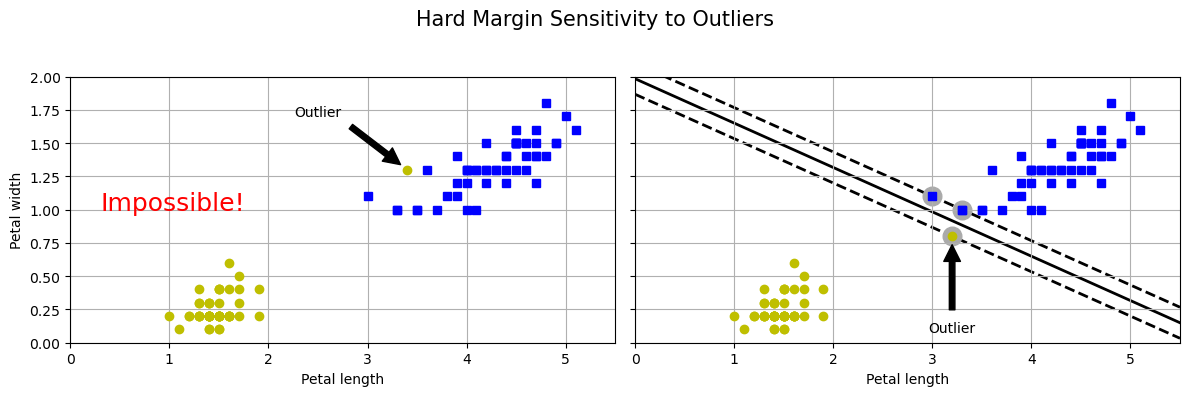

In [16]:
# Create a figure with 2 subplots, sharing the y-axis
fig, axes = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

# First subplot: Dataset with the first outlier (no decision boundary)
plt.sca(axes[0])
plt.plot(X_with_outlier1[:, 0][y_with_outlier1 == 1], X_with_outlier1[:, 1][y_with_outlier1 == 1], "bs", label="Class 1")
plt.plot(X_with_outlier1[:, 0][y_with_outlier1 == 0], X_with_outlier1[:, 1][y_with_outlier1 == 0], "yo", label="Class 0")
plt.text(0.3, 1.0, "Impossible!", color="red", fontsize=18)  # Highlight the impossibility of hard margin
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.annotate(
    "Outlier", xy=(X_outliers[0][0], X_outliers[0][1]), xytext=(2.5, 1.7),
    ha="center", arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([0, 5.5, 0, 2])
plt.grid(True)

# Second subplot: Dataset with the second outlier and decision boundary
plt.sca(axes[1])
plt.plot(X_with_outlier2[:, 0][y_with_outlier2 == 1], X_with_outlier2[:, 1][y_with_outlier2 == 1], "bs", label="Class 1")
plt.plot(X_with_outlier2[:, 0][y_with_outlier2 == 0], X_with_outlier2[:, 1][y_with_outlier2 == 0], "yo", label="Class 0")
plot_svc_decision_boundary(svm_clf_with_outlier, 0, 5.5)  # Plot decision boundary
plt.xlabel("Petal length")
plt.annotate(
    "Outlier", xy=(X_outliers[1][0], X_outliers[1][1]), xytext=(3.2, 0.08),
    ha="center", arrowprops=dict(facecolor='black', shrink=0.1)
)
plt.axis([0, 5.5, 0, 2])
plt.grid(True)

# Add a title for the entire figure
fig.suptitle("Hard Margin Sensitivity to Outliers", fontsize=15)

# Adjust layout and display the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust the layout to make room for the title
plt.show()


### Soft Margin Classification and Regularization
#### Main Points: 

- **Soft Margin Classification**: 
  - **Objective**: Find a balance between maximizing the margin (the "street") and minimizing margin violations (instances within or across the margin).
  - **Purpose**: Addresses issues of strict margin classification by allowing some instances to be within or on the wrong side of the margin.

- **Regularization Hyperparameter C**:
  - **Low C**: Results in a larger margin but allows more margin violations. This can help prevent overfitting by making the model more general, but excessive reduction can lead to underfitting.
  - **High C**: Creates a smaller margin with fewer violations, which can lead to overfitting as the model becomes more sensitive to the training data.

- **Model Behavior**:
  - **Example**: The model with a low C value (e.g., C=1) shows a larger margin with more instances in the margin or wrong side, while a high C value (e.g., C=100) shows a smaller margin with fewer violations.
  - **Overfitting vs. Underfitting**: Lowering C reduces overfitting risk but may lead to underfitting if too low.

- **Scikit-Learn Example**:
  - **Code**: The SVM model for Iris virginica detection uses `LinearSVC` with `C=1`, after scaling features, to strike a balance between fitting and generalization.

**Note:** The parameter `dual=True` is set throughout this notebook to make sure the output is unchanged.


In [17]:
# import necessary modules
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [18]:
# load and prepare the data for training
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target == 2)  # Iris virginica

In [19]:
# training the model using C=1
svm_clf = make_pipeline(StandardScaler(), LinearSVC(C=1, dual=True, random_state=42))
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [20]:
# creating new data for prediction
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [21]:
# The first plant is classified as an Iris virginica, while the second is not, calculate the score
svm_clf.decision_function(X_new)

array([ 0.66163411, -0.22036063])

#### Important Points: Class Probabilities in SVM

- **LinearSVC**:
  - **No `predict_proba()` Method**: Unlike `LogisticRegression`, `LinearSVC` does not have a method to estimate class probabilities.

- **SVC with Probability Estimates**:
  - **Using `SVC` Class**: To get class probabilities, use the `SVC` class instead of `LinearSVC`.
  - **Setting `probability=True`**: This enables the fitting of an additional model to map decision function scores to probabilities.
  - **Training Process**:
    - **Cross-Validation**: Involves 5-fold cross-validation to generate out-of-sample predictions for each training instance.
    - **Logistic Regression Model**: After cross-validation, a `LogisticRegression` model is trained on these predictions.
  - **Impact on Training Time**: This process significantly slows down the training of the SVM model.
  - **Available Methods**: Once trained, `predict_proba()` and `predict_log_proba()` methods become available.


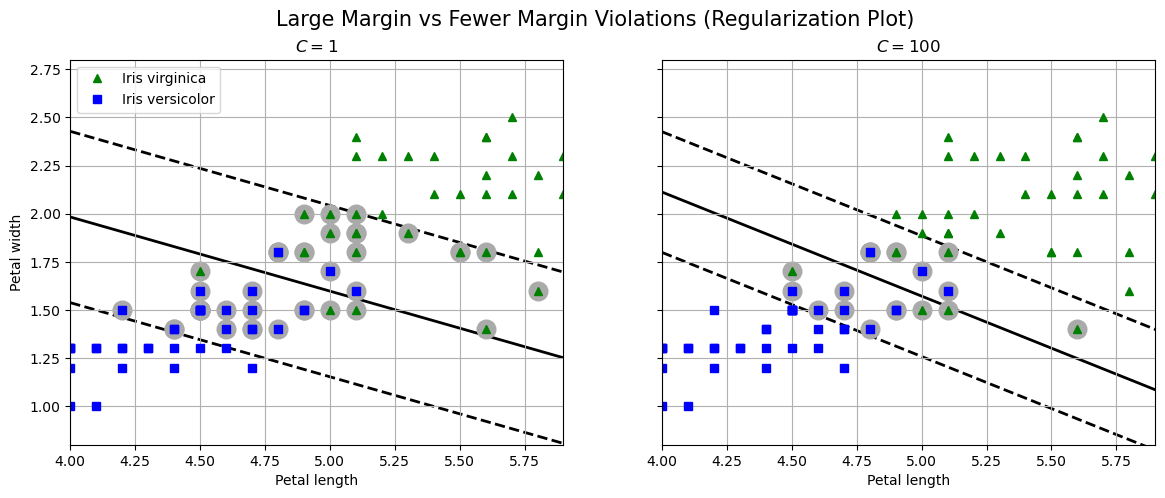

In [22]:
# Initialize the scaler and the SVM classifiers with different regularization parameters
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, max_iter=10_000, dual=True, random_state=42)
svm_clf2 = LinearSVC(C=100, max_iter=10_000, dual=True, random_state=42)

# Create pipelines that scale the features before applying the SVM
scaled_svm_clf1 = make_pipeline(scaler, svm_clf1)
scaled_svm_clf2 = make_pipeline(scaler, svm_clf2)

# Fit the SVM models to the scaled data
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

# Extract the unscaled parameters from the scaled SVM models
# Calculate the bias term in the original (unscaled) feature space
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

# Calculate the weights in the original feature space
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

# Update the intercept and coefficient for the unscaled SVM models
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find the support vectors manually (LinearSVC does not provide this automatically)
t = y * 2 - 1  # Transform labels to +1/-1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

# Assign the support vectors
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

# Create subplots to visualize the decision boundaries and support vectors
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# Plot for SVM with C=1
plt.sca(axes[0])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)  # Plot decision boundary for svm_clf1
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.title(f"$C = {svm_clf1.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# Plot for SVM with C=100
plt.sca(axes[1])
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^")
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)  # Plot decision boundary for svm_clf2
plt.xlabel("Petal length")
plt.title(f"$C = {svm_clf2.C}$")
plt.axis([4, 5.9, 0.8, 2.8])
plt.grid()

# Set the title for the entire figure
fig.suptitle("Large Margin vs Fewer Margin Violations (Regularization Plot)", fontsize=15)

# Display the plot
plt.show()


### Nonlinear SVM Classification
#### Main Points:

- **Challenges with Linear SVM**:
  - Struggle with datasets that are not linearly separable.

- **Handling Nonlinear Data**:
  - **Feature Transformation**: Adding polynomial features can sometimes transform a nonlinear dataset into a linearly separable one.
  - **Example**: A dataset with a single feature \($x_1$\) is not linearly separable. However, adding a feature \($x_2 = (x_1)^2$\) results in a 2D dataset that is linearly separable.

- **Implementation in Scikit-Learn**:
  - **Pipeline Setup**:
    - **PolynomialFeatures Transformer**: Adds polynomial features to the dataset.
    - **StandardScaler**: Scales the features.
    - **LinearSVC Classifier**: Applies linear SVM to the transformed features.
  - **Application**: This approach can be tested on the moons dataset, which consists of two interleaving crescent moons, and can be generated using the `make_moons()` function.

- **Visual Examples**:
  - Demonstrates the moons dataset, showcasing the effectiveness of polynomial feature transformation for handling nonlinear patterns.


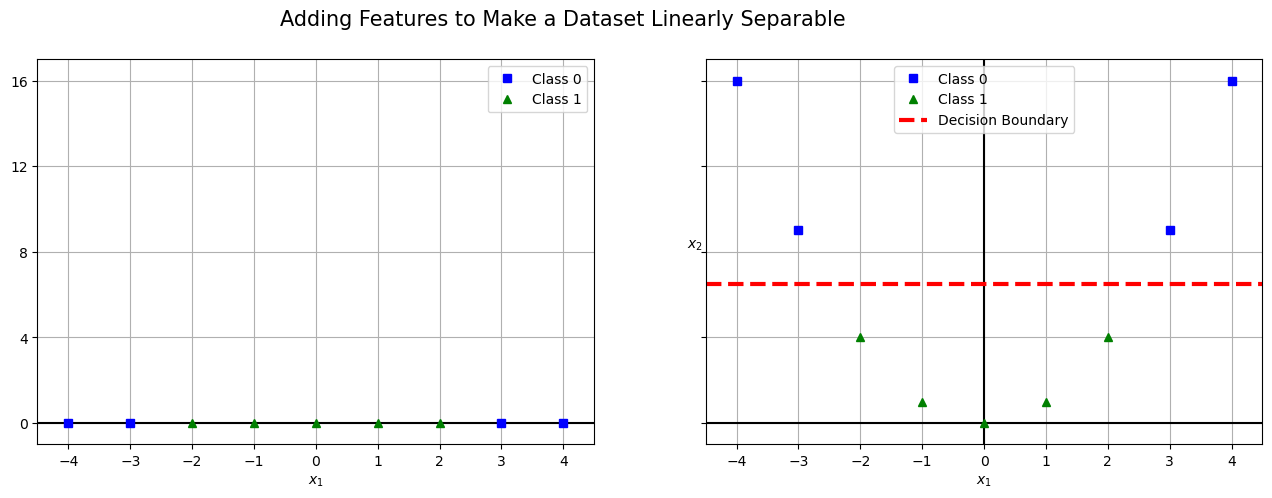

In [23]:
# Generate data
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)  # 1D feature array
X2D = np.c_[X1D, X1D**2]  # Add a polynomial feature to create 2D feature array
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])  # Labels

# Create subplots
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

# Plot 1D dataset
plt.subplot(121)
plt.grid(True)
plt.axhline(y=0, color='k')  # Add horizontal line at y=0
plt.plot(X1D[:, 0][y==0], np.zeros(y[y==0].shape), "bs", label="Class 0")  # Plot class 0 in blue squares
plt.plot(X1D[:, 0][y==1], np.zeros(y[y==1].shape), "g^", label="Class 1")  # Plot class 1 in green triangles
plt.gca().get_yaxis().set_ticks([])  # Hide y-axis ticks
plt.xlabel("$x_1$")
plt.axis([-4.5, 4.5, -0.2, 0.2])  # Set axis limits
plt.legend()

# Plot 2D dataset
plt.subplot(122)
plt.grid(True)
plt.axhline(y=0, color='k')  # Add horizontal line at y=0
plt.axvline(x=0, color='k')  # Add vertical line at x=0
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs", label="Class 0")  # Plot class 0 in blue squares
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^", label="Class 1")  # Plot class 1 in green triangles
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)  # Label y-axis with rotation=0
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])  # Set y-axis ticks
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3, label="Decision Boundary")  # Add a decision boundary
plt.axis([-4.5, 4.5, -1, 17])  # Set axis limits
plt.legend()

# Adjust layout and add title
plt.subplots_adjust(right=1)
fig.suptitle("Adding Features to Make a Dataset Linearly Separable", fontsize=15)

# Show the plot
plt.show()


**Note:** Now apply this technique on make moon dataset to see if it's really work or not, Implementation in `Scikit-Learn`.

In [24]:
# import necessary modules 
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [25]:
# prepare the data and train the model

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10_000, dual=True, random_state=42)
)
polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

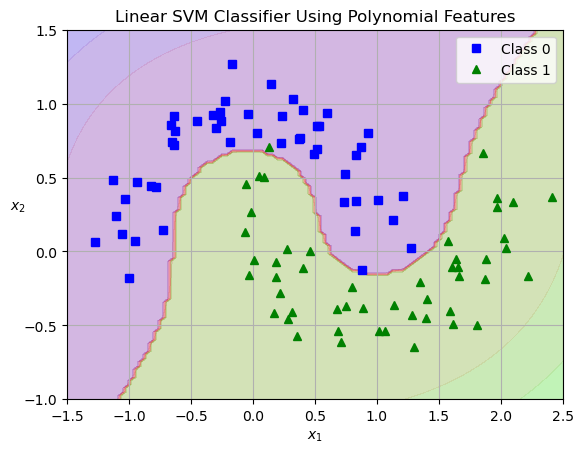

In [26]:
# define two functions to plot data and predictions

def plot_dataset(X, y, axes):
    """
    Plot the dataset with different markers for each class.
    
    Parameters:
    - X: array-like, shape (n_samples, 2)
      Feature matrix.
    - y: array-like, shape (n_samples,)
      Target labels.
    - axes: list of 4 values [x_min, x_max, y_min, y_max]
      Axis limits for the plot.
    """
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], "bs", label="Class 0")  # Blue squares for class 0
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], "g^", label="Class 1")  # Green triangles for class 1
    plt.axis(axes)  # Set axis limits
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.legend()

def plot_predictions(clf, axes):
    """
    Plot the decision boundary and margins of the classifier.
    
    Parameters:
    - clf: classifier
      The trained classifier.
    - axes: list of 4 values [x_min, x_max, y_min, y_max]
      Axis limits for the plot.
    """
    x0s = np.linspace(axes[0], axes[1], 100)  # Generate 100 points for x0
    x1s = np.linspace(axes[2], axes[3], 100)  # Generate 100 points for x1
    x0, x1 = np.meshgrid(x0s, x1s)  # Create a meshgrid
    X = np.c_[x0.ravel(), x1.ravel()]  # Create feature matrix from meshgrid
    y_pred = clf.predict(X).reshape(x0.shape)  # Predict class labels
    y_decision = clf.decision_function(X).reshape(x0.shape)  # Get decision function values
    
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)  # Plot the predicted class regions
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)  # Plot the decision function regions

# Example usage
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.title("Linear SVM Classifier Using Polynomial Features")
plt.show()


### Polynomial Kernel
#### Main Points:

- **Polynomial Features**:
  - **Advantages**: 
    - Simple to implement.
    - Effective with various machine learning algorithms, not just SVMs.
  - **Limitations**:
    - Low-degree polynomials may struggle with complex datasets.
    - High-degree polynomials can lead to a large number of features, slowing down the model.

- **Kernel Trick**:
  - **Purpose**: Allows SVMs to achieve results similar to having many polynomial features without the actual feature explosion.
  - **Benefit**: Avoids combinatorial explosion, making it practical to use high-degree polynomials.

- **SVC Class**:
  - **Function**: Implements the kernel trick for polynomial kernels.

- **Example**:
  - **Moons Dataset**:
    - **3rd-Degree Polynomial Kernel**: Provides a basic polynomial fit.
    - **10th-Degree Polynomial Kernel**: Offers a more complex fit, which might lead to overfitting.

- **Hyperparameters**:
  - **Polynomial Degree**:
    - **Reduce Degree**: To address overfitting.
    - **Increase Degree**: To address underfitting.
  - **coef0**: Balances the influence of high-degree terms versus low-degree terms.

- **Tuning**:
  - **Automatic Tuning**: Typically done using methods like randomized search.
  - **Manual Understanding**: Important for understanding hyperparameters and optimizing the search space.


In [27]:
# import necessary module
from sklearn.svm import SVC

In [28]:
# train the model with degree 3, and coef0=1

poly_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="poly", degree=3, coef0=1, C=5))
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

In [29]:
# train the model with degree 10, and coef0=100
poly100_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="poly", degree=10, coef0=100, C=5))
poly100_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

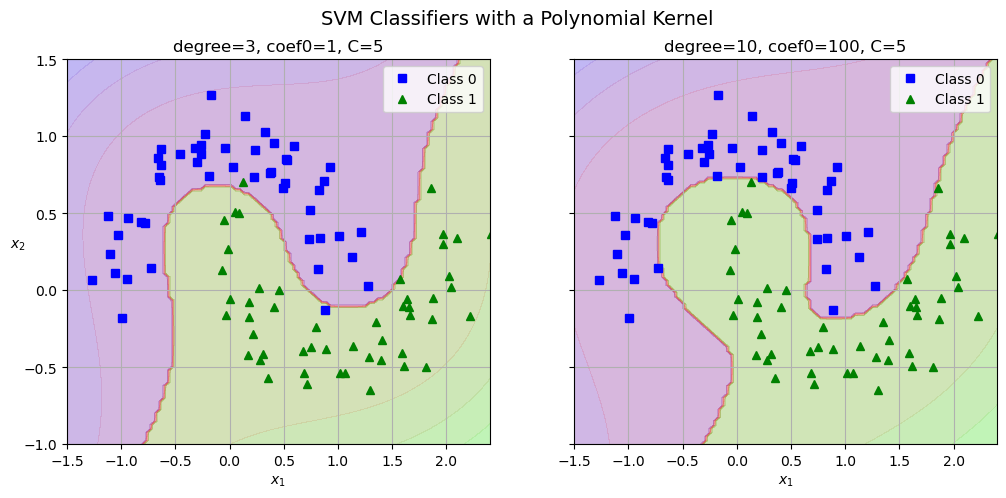

In [30]:
# plotting the outcome
fig, axes = plt.subplots(ncols=2, figsize=(12, 5), sharey=True)

# Plot for polynomial kernel with degree=3
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

# Plot for polynomial kernel with degree=10
plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")  # Clear ylabel for the second plot

# Set the main title for the figure
fig.suptitle("SVM Classifiers with a Polynomial Kernel", fontsize=14)

# Show the plots
plt.show()


### Nonlinear Problems and Similarity Functions

- **Feature Addition with Similarity Functions**:
  - Another approach to handling nonlinear problems involves adding features computed using a similarity function.
  - This method measures how much each instance resembles a particular landmark, similar to adding geographic similarity features.

- **Example with Gaussian RBF**:
  - Consider a 1D dataset with landmarks at `x1 = -2` and `x1 = 1`.
  - A Gaussian RBF (Radial Basis Function) is used as the similarity function with a parameter `γ = 0.3`.
  - This bell-shaped function ranges from 0 (far from the landmark) to 1 (at the landmark).

- **Computing New Features**:
  - For an instance at `x1 = -1`, compute the similarity to each landmark:
    - Distance to first landmark: 1
    - Distance to second landmark: 2
    - New features: 
      - `x2 = exp(-0.3 × 1^2) ≈ 0.74`
      - `x3 = exp(-0.3 × 2^2) ≈ 0.30`
  - The transformed dataset (dropping original features) becomes linearly separable.

- **Selecting Landmarks**:
  - A simple method is to use every instance in the dataset as a landmark.
  - This results in a large number of features, making the dataset very high-dimensional.
  - The transformed training set has `m` instances and `m` features (assuming original features are dropped), which can be problematic with very large datasets.


In [32]:
# Define a function to compute Gaussian RBF
def gaussian_rbf(x, landmark, gamma):
    """Compute Gaussian RBF similarity."""
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

In [33]:
# Parameters
gamma = 0.3

# 1D data
x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)

# Compute RBF features for landmarks
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

# Original dataset and transformed features
X1D = np.array([[-4], [-2], [0], [1], [2], [3], [4], [5], [6]])
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

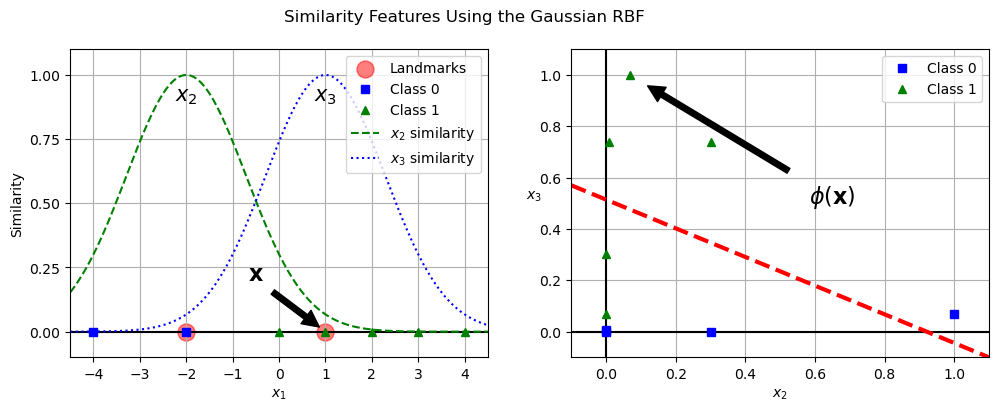

In [34]:
# plotting the outcome
plt.figure(figsize=(10.5, 4))

# Plot similarity features (Original Feature Space)
plt.subplot(121)
plt.grid(True)  # Add grid lines for better readability
plt.axhline(y=0, color='k')  # Add a horizontal line at y=0 for reference

# Plot landmarks on the x-axis
plt.scatter(
    x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red", label="Landmarks"
)

# Plot data points for Class 0 and Class 1
plt.plot(
    X1D[:, 0][yk == 0], np.zeros(4), "bs", label="Class 0"
)
plt.plot(
    X1D[:, 0][yk == 1], np.zeros(5), "g^", label="Class 1"
)

# Plot similarity features to the landmarks
plt.plot(x1s, x2s, "g--", label="$x_2$ similarity")  # Similarity to landmark at -2
plt.plot(x1s, x3s, "b:", label="$x_3$ similarity")  # Similarity to landmark at 1

# Set y-axis ticks to specific values for clarity
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])

# Label the x-axis and y-axis
plt.xlabel("$x_1$")
plt.ylabel("Similarity")

# Add a legend to describe the plotted elements
plt.legend()

# Annotate a specific point on the plot
plt.annotate(
    r'$\mathbf{x}$',
    xy=(X1D[3, 0], 0),
    xytext=(-0.5, 0.20),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16
)

# Add text labels for similarity features
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=15)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=15)

# Set axis limits for better visualization
plt.axis([-4.5, 4.5, -0.1, 1.1])

# Plot transformed features (Feature Space After Applying Gaussian RBF)
plt.subplot(122)
plt.grid(True)  # Add grid lines for better readability
plt.axhline(y=0, color='k')  # Add a horizontal line at y=0 for reference
plt.axvline(x=0, color='k')  # Add a vertical line at x=0 for reference

# Plot data points in the transformed feature space
plt.plot(
    XK[:, 0][yk == 0], XK[:, 1][yk == 0], "bs", label="Class 0"
)
plt.plot(
    XK[:, 0][yk == 1], XK[:, 1][yk == 1], "g^", label="Class 1"
)

# Label the x-axis and y-axis
plt.xlabel("$x_2$")
plt.ylabel("$x_3$", rotation=0)

# Add a legend to describe the plotted elements
plt.legend()

# Annotate the transformed feature space
plt.annotate(
    r'$\phi\left(\mathbf{x}\right)$',
    xy=(XK[3, 0], XK[3, 1]),
    xytext=(0.65, 0.50),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.1),
    fontsize=16
)

# Plot a decision boundary in the transformed feature space
plt.plot(
    [-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3, label="Decision boundary"
)

# Set axis limits for better visualization
plt.axis([-0.1, 1.1, -0.1, 1.1])

# Adjust subplot layout and add a main title
plt.subplots_adjust(right=1)
plt.suptitle("Similarity Features Using the Gaussian RBF", fontsize=12)

# Show the final plot
plt.show()



### Similarity Features Method and Kernel Trick
#### Main Points:
- **Similarity Features Method**: 
  - Useful with any machine learning algorithm but can be computationally expensive, especially with large training sets.
  - Like the polynomial features method, similarity features can increase model complexity and performance.

- **Kernel Trick in SVM**:
  - The **kernel trick** allows SVM to achieve similar results as adding many similarity features, without actually computing them.
  - SVC class with the **Gaussian RBF kernel** is a common choice for nonlinear data.
  
- **Hyperparameter Gamma (γ)**:
  - **Increasing gamma (γ)**: Makes the bell-shaped curve narrower, so each instance influences a smaller area, creating a more irregular decision boundary.
  - **Decreasing gamma**: Makes the curve wider, so instances influence a larger area, producing a smoother decision boundary.
  - **Gamma as a regularization hyperparameter**: 
    - If the model **overfits**, reduce γ.
    - If the model **underfits**, increase γ.

- **Hyperparameter C**:
  - Similar to γ, **C** controls the regularization strength and affects the decision boundary.

- **Choosing Kernels**:
  - **Start with the linear kernel**: It's faster and often effective, especially with large datasets.
  - If the dataset is not too large, consider kernelized SVMs, starting with the **Gaussian RBF kernel**.
  - **Experiment with other kernels**: Use hyperparameter search, especially if there are specialized kernels for your dataset structure (e.g., string kernels for text or DNA classification).

- **Tricks**:
  - The **LinearSVC class** is faster than `SVC(kernel="linear")` for large training sets.
  - **Gaussian RBF kernel** often works well as a default choice for nonlinear datasets.
  - Try specialized kernels when applicable to your data structure.


In [35]:
# SVC class with the Gaussian RBF kernel

rbf_kernel_svm_clf = make_pipeline(StandardScaler(), SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [36]:
# importing the method
from sklearn.svm import SVC

In [37]:
# setting the parameters, and train the models by using those different parameters
gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = make_pipeline(StandardScaler(),SVC(kernel="rbf", gamma=gamma, C=C))
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

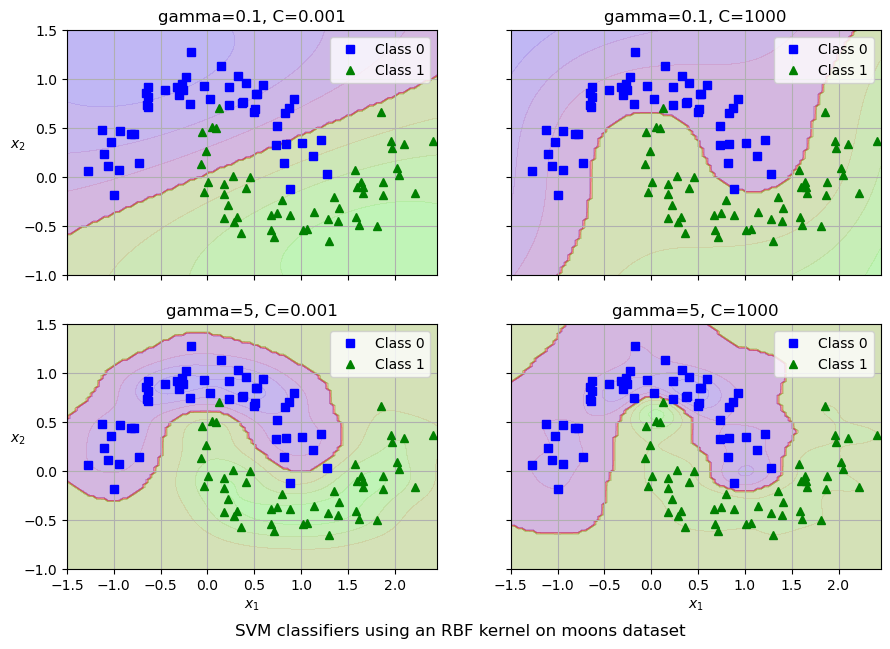

In [38]:
# plotting the outcome
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(f"gamma={gamma}, C={C}")
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
fig.supxlabel("SVM classifiers using an RBF kernel on moons dataset", fontsize=12)
plt.show()

**_______________________________________________________________________________________________________________________**

###  Summary On SVM Classes:

- **LinearSVC Class**:
  - Based on the **liblinear** library, optimized for **linear SVMs**.
  - **Does not support the kernel trick**.
  - **Scales linearly** with the number of training instances and features.
  - **Training time complexity**: O(m × n), where m is the number of instances and n is the number of features.
  - Higher precision increases computation time, controlled by the **tolerance (tol)** hyperparameter.

- **SVC Class**:
  - Based on the **libsvm** library, which supports the **kernel trick**.
  - **Training time complexity**: Between O(m² × n) and O(m³ × n), making it slower on large datasets.
  - Best for **small to medium nonlinear datasets**.
  - **Scales well with features**, especially with **sparse data** where instances have few nonzero features.

- **SGDClassifier Class**:
  - Performs **large margin classification** like SVMs.
  - Uses **stochastic gradient descent (SGD)**, making it efficient for **incremental learning** and **out-of-core learning** (i.e., handling large datasets that do not fit in RAM).
  - **Training time complexity**: O(m × n), making it scalable for large datasets.
  - Hyperparameters such as **regularization** (`alpha` and `penalty`) and **learning rate** can be adjusted to achieve results similar to linear SVMs.

- **Key Takeaway**:
  - **LinearSVC** is suitable for **large linear datasets**.
  - **SVC** is ideal for **small or medium nonlinear datasets** where the **kernel trick** can be applied.
  - **SGDClassifier** is effective for **very large datasets** and **out-of-core learning**.

- **Comparison**:
  - The different SVM classification classes in Scikit-Learn have varying computational complexities and are suited for different use cases based on dataset size and feature count.


**_______________________________________________________________________________________________________________________**

### SVMs for Regression
#### Main Points: 
- **SVM Regression Objective**:
  - SVM regression adjusts the goal compared to classification: it aims to fit as many instances as possible **on the "street"** (the margin area) while limiting **margin violations** (instances outside the street).
  - This differs from SVM classification, which tries to find the **widest possible street** between classes.

- **Hyperparameter ϵ (epsilon)**:
  - The **width of the street** in SVM regression is controlled by the hyperparameter **ϵ**.
  - A **small ϵ** results in a **narrower margin**, requiring more instances to fit closely.
  - A **larger ϵ** allows more flexibility and fewer violations, leading to a **wider margin**.

- **Effect of Reducing ϵ**:
  - Reducing **ϵ** increases the number of **support vectors**, effectively **regularizing** the model.
  - The model becomes **ϵ-insensitive**, meaning adding more training instances within the margin will not affect its predictions.

- **Linear SVM Regression with Scikit-Learn**:
  - Scikit-Learn’s **LinearSVR** class can be used for **linear SVM regression**.
  - Example code is provided for training a model, as demonstrated in **Figure 5-10**, showing the effect of different **ϵ** values on the margin.
  
- **Visual Example (Figure 5-10)**:
  - Two models are trained with:
    - **Small margin** (**ϵ = 0.5**).
    - **Larger margin** (**ϵ = 1.2**).


In [39]:
# import the module
from sklearn.svm import LinearSVR

In [40]:
# generating linear dataset, and train the above model
np.random.seed(42)
X = 2 * np.random.rand(50, 1)
y = 4 + 3 * X[:, 0] + np.random.randn(50)

svm_reg = make_pipeline(StandardScaler(), LinearSVR(epsilon=0.5, dual=True, random_state=42))
svm_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(epsilon=0.5, random_state=42))])

In [45]:
# defining a function to find support vectors

def find_support_vectors(svm_reg, X, y):
    """
    Identify the support vectors in a Support Vector Machine (SVM) regression model.

    Parameters:
    -----------
    svm_reg : object
        The trained SVM regression model.
    X : array-like, shape (n_samples, n_features)
        The input data used for training the model.
    y : array-like, shape (n_samples,)
        The target values corresponding to the input data.

    Returns:
    --------
    array-like, shape (n_support_vectors, 1)
        Indices of the data points that are outside the epsilon margin,
        representing the support vectors.

    Description:
    ------------
    This function identifies the support vectors in the provided SVM regression model
    by comparing the predicted values `y_pred` with the true values `y`.
    The support vectors are those data points for which the absolute error
    between `y` and `y_pred` exceeds the model's epsilon margin (`epsilon`).
    """
    y_pred = svm_reg.predict(X)
    epsilon = svm_reg[-1].epsilon
    off_margin = np.abs(y - y_pred) >= epsilon
    return np.argwhere(off_margin)


In [46]:
# defining function to plot the outcome

def plot_svm_regression(svm_reg, X, y, axes):
    """
    Plot the SVM regression model along with its epsilon margin and support vectors.

    Parameters:
    -----------
    svm_reg : object
        The trained SVM regression model.
    X : array-like, shape (n_samples, n_features)
        The input data points.
    y : array-like, shape (n_samples,)
        The target values corresponding to the input data.
    axes : tuple, shape (2,)
        The x-axis limits for the plot.

    Description:
    ------------
    This function visualizes the SVM regression line, its epsilon margin, 
    and the support vectors. It plots the following:
    - The regression prediction line (`y_pred`).
    - The epsilon margin above and below the regression line (`y_pred + epsilon` and `y_pred - epsilon`).
    - The support vectors are highlighted with a distinct marker size and color.
    
    The plot shows the relationship between the input feature `X` and the predicted
    target values `y_pred`, giving insight into how well the SVM regression fits
    the data.
    """
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    epsilon = svm_reg[-1].epsilon

    # Plot the predicted values and epsilon margin
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$", zorder=-2)
    plt.plot(x1s, y_pred + epsilon, "k--", zorder=-2)
    plt.plot(x1s, y_pred - epsilon, "k--", zorder=-2)

    # Plot support vectors
    plt.scatter(X[svm_reg._support], y[svm_reg._support], s=180,
                facecolors='#AAA', zorder=-1)

    # Plot the original data points
    plt.plot(X, y, "bo")

    # Set axis labels and legend
    plt.xlabel("$x_1$")
    plt.legend(loc="upper left")
    plt.axis(axes)


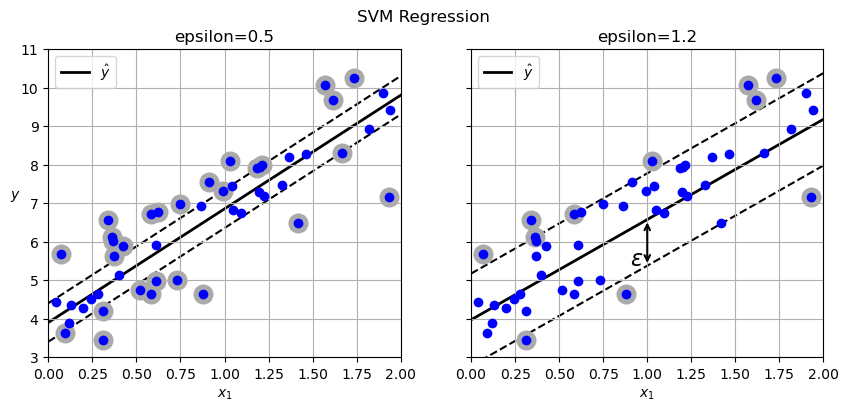

In [47]:
# Train SVM regression models with different epsilon values
svm_reg2 = make_pipeline(StandardScaler(), LinearSVR(epsilon=1.2, dual=True, random_state=42))
svm_reg2.fit(X, y)

# Find and assign support vectors for both models
svm_reg._support = find_support_vectors(svm_reg, X, y)
svm_reg2._support = find_support_vectors(svm_reg2, X, y)

# Predict values for a specific x-value (eps_x1) using the second SVM regression model
eps_x1 = 1
eps_y_pred = svm_reg2.predict([[eps_x1]])

# Create subplots for visualizing both regression models
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plot the first SVM regression model
plt.sca(axes[0])
plot_svm_regression(svm_reg, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

# Plot the second SVM regression model with epsilon annotation
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(f"epsilon={svm_reg2[-1].epsilon}")

# Annotate epsilon distance on the second plot
plt.annotate(
    '', xy=(eps_x1, eps_y_pred), xycoords='data',
    xytext=(eps_x1, eps_y_pred - svm_reg2[-1].epsilon),
    textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
)
plt.text(0.90, 5.4, r"$\epsilon$", fontsize=16)
plt.grid()
fig.suptitle("SVM Regression", fontsize=12)
plt.show()

### Kernelized SVM Regression
#### Summary:

- **Kernelized SVM for Nonlinear Regression**: Kernelized SVM models are effective for nonlinear regression tasks. By using a kernel function, such as a polynomial kernel, SVM can model complex relationships in the data.

- **Scikit-Learn SVR Class**:
  - **SVR Class**: Implements the kernel trick for nonlinear regression, similar to the SVC class for classification.
  - **LinearSVR Class**: Used for linear SVM regression, scales linearly with the size of the training set, analogous to the LinearSVC class.
  - **Performance**: The SVR class becomes inefficient with very large training sets, similar to the SVC class.

- **Application for Novelty Detection**: SVMs can also be employed for novelty detection, identifying outliers or new data points that significantly differ from the training set.


In [53]:
# import module
from sklearn.svm import SVR

In [55]:
# generate a simple quadratic dataset, and train a SVR model with less regularization
np.random.seed(42)
X = 2 * np.random.rand(50, 1) - 1
y = 0.2 + 0.1 * X[:, 0] + 0.5 * X[:, 0] ** 2 + np.random.randn(50) / 10

svm_poly_reg = make_pipeline(StandardScaler(),SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1))
svm_poly_reg.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=0.01, degree=2, kernel='poly'))])

In [56]:
# train a SVR model with more regularization
svm_poly_reg2 = make_pipeline(StandardScaler(),SVR(kernel="poly", degree=2, C=100))
svm_poly_reg2.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, degree=2, kernel='poly'))])

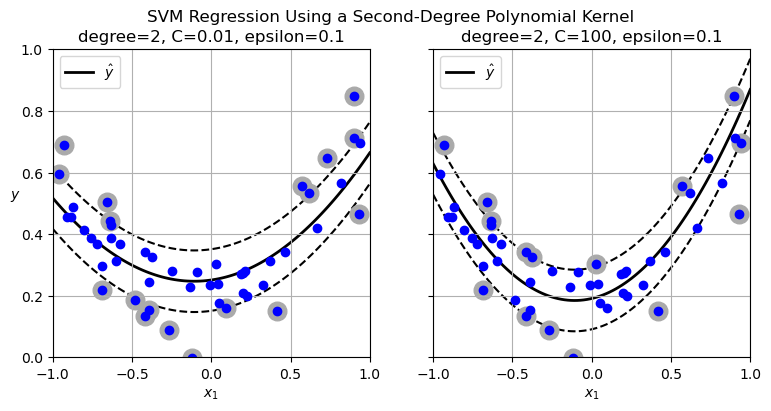

In [57]:
# Find support vectors for both models
svm_poly_reg._support = find_support_vectors(svm_poly_reg, X, y)
svm_poly_reg2._support = find_support_vectors(svm_poly_reg2, X, y)

# Set up the plot
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# Plot for the first SVM model
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg[-1].degree}, C={svm_poly_reg[-1].C}, epsilon={svm_poly_reg[-1].epsilon}")
plt.ylabel("$y$", rotation=0)
plt.grid()

# Plot for the second SVM model
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(f"degree={svm_poly_reg2[-1].degree}, C={svm_poly_reg2[-1].C}, epsilon={svm_poly_reg2[-1].epsilon}")
plt.grid()

fig.suptitle("SVM Regression Using a Second-Degree Polynomial Kernel", fontsize=12)
plt.show()


**Left Plot** shows SVM regression with a small regularization parameter \( C \), resulting in more regularization, and **Right Plot** displays SVM regression with a large \( C \), leading to less regularization.

##### That is the complete package of concepts of SVM in binary classification and regression tasks! Thank You!